# Week 7 lab: Clustering plus pre-processing

This lab has two parts. Part 1 is about the k-means clustering algorithm, and Part 2 is about pre-processing.

## Part 1: Clustering with the k-means algorithm

As you will remember from lectures, the k-means algorithm is a clustering technique. Given unlabelled data, it tries to find meaningful groupings (clusters) of the data. In this exercise, you will generate data and experiment with the algorithm using various values of k (remember that in the absence of information, we do not know what the best value of k is).

You should use the function *KMeans* in **sklearn.cluster** https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

For your reference, here is an excellent tutorial on k-means and Python:

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [ ]:
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt

**Q1.** Let's generate 100 random values from a 2-d multivariate normal distribution. This is a distribution with just one peak - in other words, we will assume all data are from the same class.



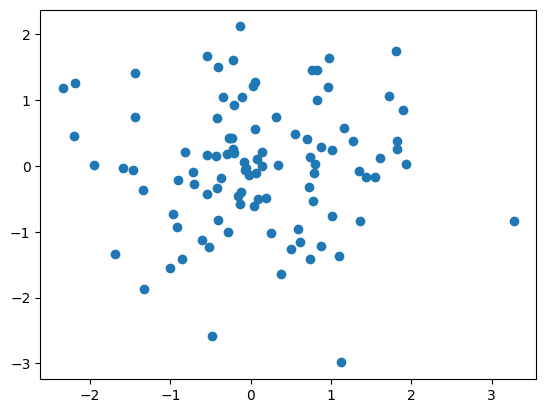

In [ ]:
nbpts1 = 100
mu1 = [0,0] # the mean of the first cluster (this is a vector as we are in 2D)
sigma1 = [[1,0],[0,1]] # the covariance matrix of the first cluster -- this one is not correlated
data = np.random.multivariate_normal(mu1,sigma1,nbpts1)
plt.scatter(data[:,0],data[:,1])

Apply k-means with k taking values from 5 to 1. For each k, plot the final clustering to see what has happened. Plot the centroids too. Which value of k is best? Does that make sense?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

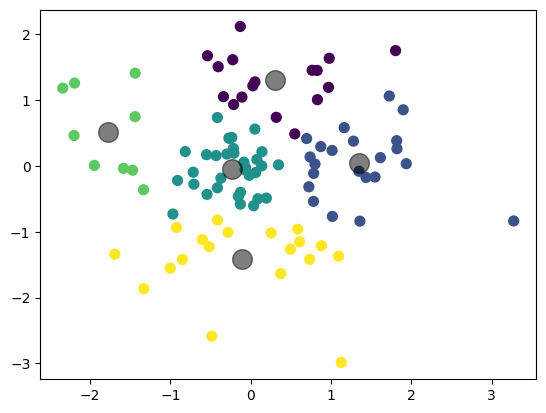

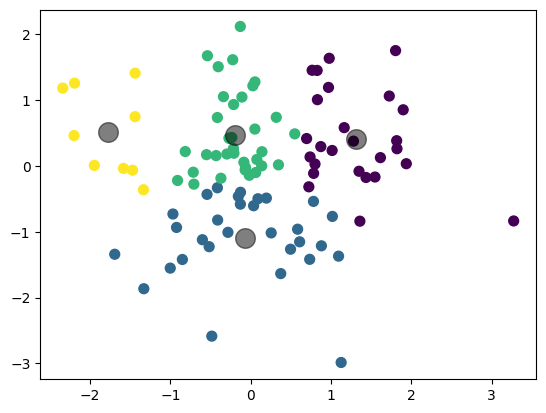

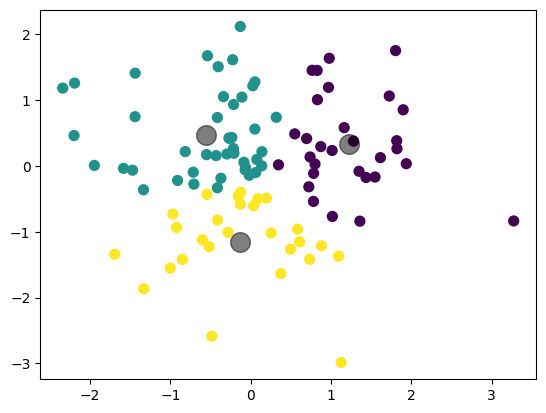

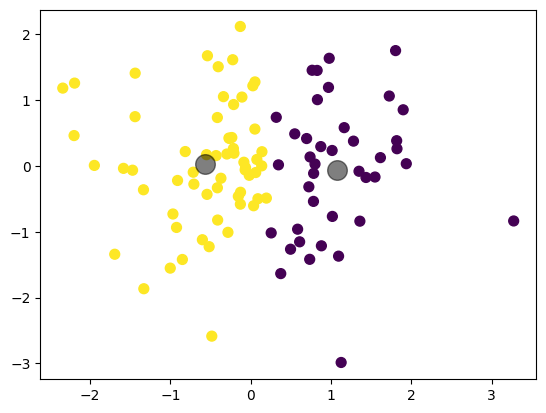

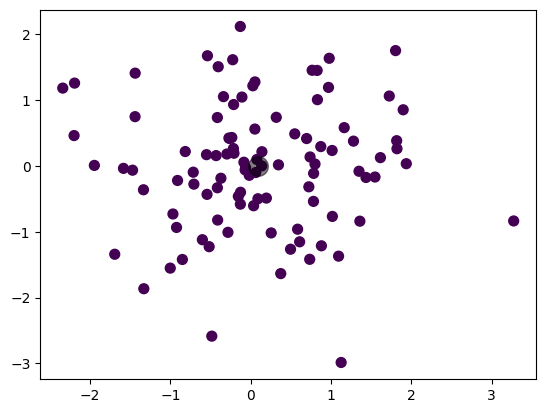

In [ ]:
for k in np.arange(5,0,-1):

    kmeans = KMeans(n_clusters=k, random_state=0).fit(data) # Fit KMeans model with k cluster
    idx = kmeans.predict(data) # Predict class membership
    plt.figure(k)
    plt.scatter(data[:, 0], data[:,1], c=idx, s=50, cmap='viridis')
    C = kmeans.cluster_centers_
    plt.scatter(C[:, 0], C[:,1], c='black', s=200, alpha=0.5); # Plotting centroids

plt.show()

There is only one class here, but if we did have to divide the data up into more than one class, the algorithm seems to more-or-less be achieving a good solution.

**Q2.** Generate 200 random values from a bimodal distribution i.e., a distribution with two peaks. These data should be thought of as coming from two classes that are not exactly overlapping. The simplest way to do this is simply to generate N (with N between 1 and 200) data points from a first multivariate normal distribution and then generate (200-N) data points from another unimodal distribution (with different mean and standard deviations from the first - how different is for you to decide). You can also refer back to lab 5. Again, apply k-means with k taking values from 5 to 1. Plot the final clustering to see what happened. Which value of k is best? Does that make sense?

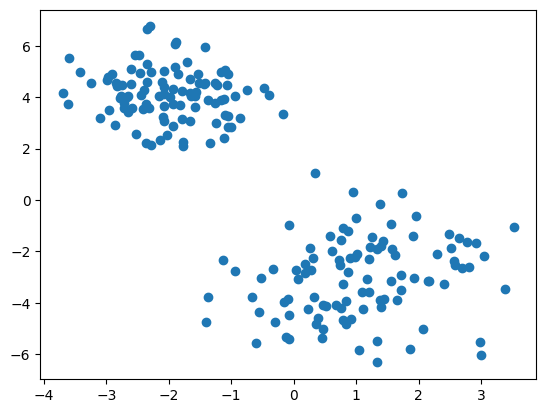

In [ ]:
nbpts1 = 100 # Number of points in first cluster (vary to explore effect of number of points)
mu1 = [-2,4] # the mean of the first cluster (this is a vector as we are in 2D) -- move it around
sigma1 = [[0.5,0],[0,0.9]] # the covariance matrix of the first cluster -- this one is not correlated
data1 = np.random.multivariate_normal(mu1,sigma1,nbpts1) #

nbpts2 = 100 # Number of points in second cluster (vary to explore effect of number of points)
mu2 = [1,-3] # the mean of the second cluster (this is a vector as we are in 2D) -- move it around
sigma2 = [[1.2,0.2],[0.2,2.3]] # the covariance matrix of the second cluster -- this one is correlated
data2 = np.random.multivariate_normal(mu2,sigma2,nbpts2) #

data = np.concatenate((data1,data2),axis=0) # Concatenate the data by row
plt.scatter(data[:,0],data[:,1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

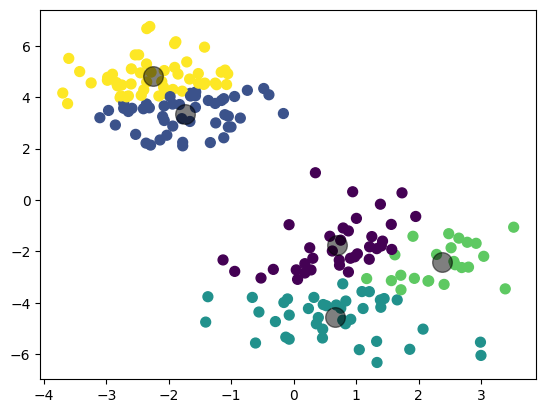

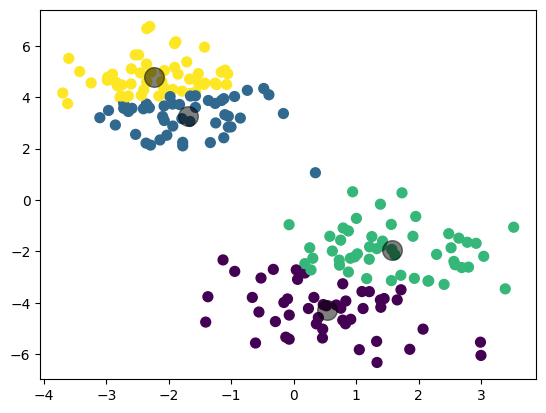

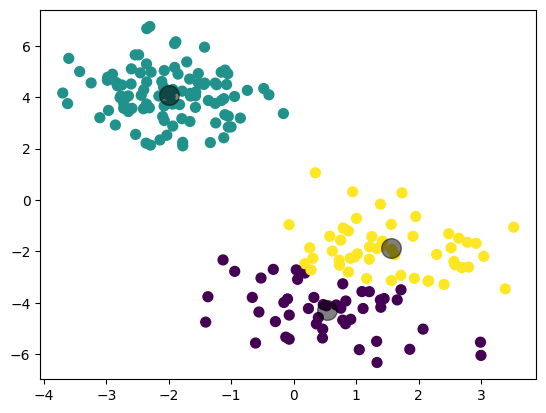

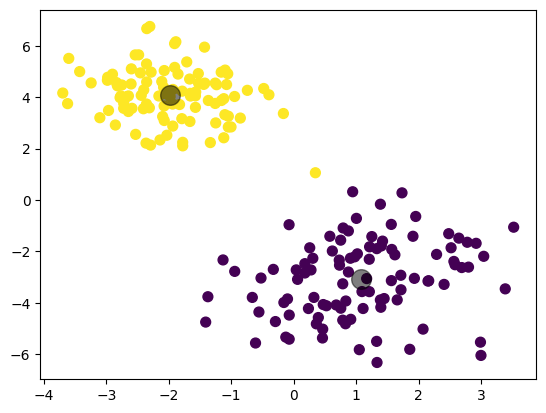

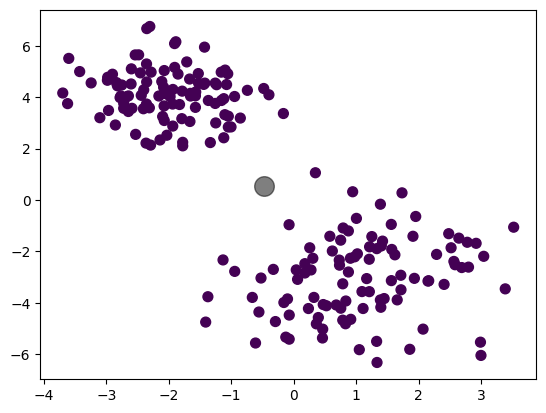

In [ ]:
for k in np.arange(5,0,-1):

    kmeans = KMeans(n_clusters=k, random_state=0).fit(data) # Fit KMeans model with k cluster
    idx = kmeans.predict(data) # Predict class membership
    plt.figure(k)
    plt.scatter(data[:, 0], data[:,1], c=idx, s=50, cmap='viridis')
    C = kmeans.cluster_centers_
    plt.scatter(C[:, 0], C[:,1], c='black', s=200, alpha=0.5); # Plotting centroids

plt.show()


# Part 2: Pre-processing

The second part of the lab contains a brief demo of normalisation, followed by an exercise on PCA. There are then a couple of optional extension exercises, including one that combines PCA and clustering.

For your reference, here is a link to resources on pre-processing data using **sklearn**:

https://scikit-learn.org/stable/modules/preprocessing.html

And here is a good resource on PCA:

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

## Simple normalisation

Let's generate another set of basic Gaussian data.

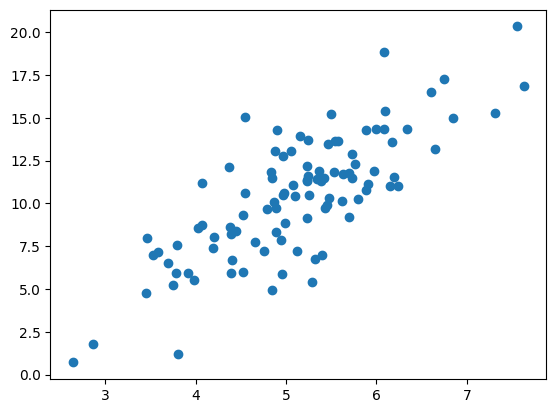

In [ ]:
nbpts=100 # number of data points to generate

mu=[5,10] # mean of x and mean of y
sigma=[1,4] # standard deviation of x and standard deviation of y
corr=0.8 # correlation between x and y. This lies between -1 and 1.
cov=corr*sigma[0]*sigma[1]  # covariance, which is correlation times the 2 std devs.

C=[[sigma[0]**2,cov],[cov,sigma[1]**2]] #  covariance matrix

data=np.random.multivariate_normal(mu,C,nbpts)
plt.scatter(data[:,0],data[:,1])

Now let's normalise it. Note that we take the mean and standard deviation across rows here (implemented by the argument 0 when running np.mean and np.std) to obtain these in each column (dimension).

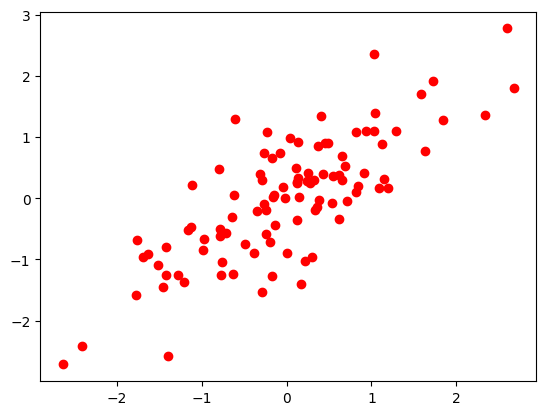

In [ ]:
data_norm = (data-np.mean(data,0))/np.std(data,0) # Note vectorised operations for mean and standard deviation.
plt.scatter(data_norm[:,0],data_norm[:,1],c='r') # Normalised data in red

# Principal Component Analysis (PCA)

**Q3.** Use Principal Component Analysis to reduce the dimension of the data to 1 (i.e. use one principal component), and plot the result. What happens if you use two principal components?

You can either use sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

or, if you like a challenge, obtain the principal components with your own code, after finding the eigenvalues and eigenvectors of the covariance matrix using *eig* from **scipy.linalg**.


For the **sklearn** method please read the manual. Here is how to code this yourself (just with a function to compute the eigenvalues and eigenvectors).

First principal component, plotted on a new x-axis

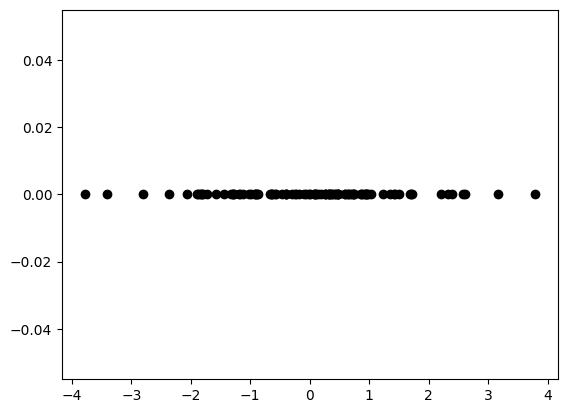

In [ ]:
import scipy.linalg as linalg

C = np.cov(data_norm.T) # Calculate the covariance matrix of the normalised data
[lambda_arr,U] = linalg.eig(C) # Returns array (not diagonal matrix) of lambda (eigenvalues) and U (eigenvector matrix)
largest_eig_idx = np.where(lambda_arr==max(lambda_arr))[0] # Find index of largest eigenvalue
data_reduced = np.dot(data_norm,U[:,largest_eig_idx]); # This is a simple matrix vector multiplication (a dot product)
plt.scatter(data_reduced,np.zeros((len(data_reduced),1)),c='k'); # in black
plt.show()

Now, let's plot the first principal component on the x axis and the second principal component on the y axis.

In [ ]:
smaller_eig_idx = np.where(lambda_arr==min(lambda_arr))[0] # Find index of the smaller eigenvalue
data_PC2 = np.dot(data_norm,U[:,smaller_eig_idx]) # Extract component in direction of eigenvector with smaller eigenvalue

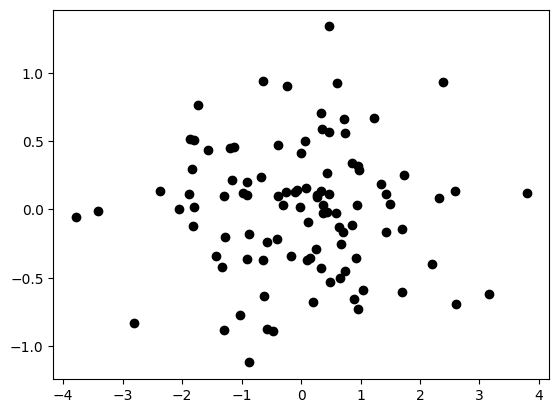

In [ ]:
plt.scatter(data_reduced,data_PC2,c='k'); # in black
plt.show()

You can see that the principal components are not correlated, and that the variance is greater in the x direction (first principal component)
than in the y-direction (second principal component).